In [2]:
!pip install numpy

In [9]:
!pip install tensorflow-gpu

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\feyza\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\feyza\\AppData\\Local\\Temp\\pip-install-6hiu_fov\\tensorflow-gpu_60febb370e5d47db98c3ef7fcda67e12\\setup.py'"'"'; __file__='"'"'C:\\Users\\feyza\\AppData\\Local\\Temp\\pip-install-6hiu_fov\\tensorflow-gpu_60febb370e5d47db98c3ef7fcda67e12\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\feyza\AppData\Local\Temp\pip-wheel-abvmttv4'
       cwd: C:\Users\feyza\AppData\Local\Temp\pip-install-6hiu_fov\tensorflow-gpu_60febb370e5d47db98c3ef7fcda67e12\
  Complete output (17 lines):
  Traceback (most recent call last):
    File "<string>", line 1, in <module>
    File "C:\Us

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
    Running setup.py install for tensorflow-gpu: started
    Running setup.py install for tensorflow-gpu: finished with status 'error'



  ERROR: Failed building wheel for tensorflow-gpu
    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\feyza\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\feyza\\AppData\\Local\\Temp\\pip-install-6hiu_fov\\tensorflow-gpu_60febb370e5d47db98c3ef7fcda67e12\\setup.py'"'"'; __file__='"'"'C:\\Users\\feyza\\AppData\\Local\\Temp\\pip-install-6hiu_fov\\tensorflow-gpu_60febb370e5d47db98c3ef7fcda67e12\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record 'C:\Users\feyza\AppData\Local\Temp\pip-record-gyelqy_p\install-record.txt' --single-version-externally-managed --compile --install-headers 'C:\Users\feyza\anaconda3\Include\tensorflow-gpu'
         cwd: C:\Users\feyza\AppData\Local\Temp\

In [1]:
import sys
sys.version

'3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [10]:
import tensorflow as tf

In [16]:
!pip install --upgrade tensorflow

In [21]:
gpus = tf.config.list_physical_devices('GPU')

In [22]:
gpus

[]

In [20]:
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    tf.config.set_visible_devices(physical_devices[0], 'GPU')


In [18]:
if gpus:
    print('yes')

In [14]:
gpus = tf.config.list_physical_devices('GPU')

if gpus:
    try:
        tf.config.experimental.set_virtual_device_configuration(
            gpus[0],
            [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=5120)]
        )
    except RuntimeError as e:
        print(e)


In [3]:
df = pd.read_csv('labels.csv')
df.head()

,filepath,xmin,ymin,xmax,ymax
0,./annotations\Cars0.xml,226,125,419,173
1,./annotations\Cars1.xml,134,128,262,160
2,./annotations\Cars10.xml,140,5,303,148
3,./annotations\Cars100.xml,175,114,214,131
4,./annotations\Cars101.xml,167,202,240,220


In [4]:
np.version.version

'1.26.2'

In [5]:
import xml.etree.ElementTree as xet

In [6]:
filename = df['filepath'][1]
filename

'./annotations\\Cars1.xml'

In [32]:
filename_image = xet.parse(filename).getroot().find('filename').text

In [33]:
filename_image

'Cars1.png'

In [34]:
def getFilename(filename):
    filename_image = xet.parse(filename).getroot().find('filename').text
    filepath_image = os.path.join('./images',filename_image)
    return filepath_image

In [35]:
getFilename(filename)

'./images\\Cars1.png'

In [36]:
image_path=list(df['filepath'].apply(getFilename))
image_path[1]

'./images\\Cars1.png'

In [10]:
np.version.version

'1.26.2'

In [38]:
file_path = image_path[1]
print(image_path[1])
print(file_path)

./images\Cars1.png
./images\Cars1.png


In [43]:
##verify image and output
import cv2
img = cv2.imread(file_path)
cv2.namedWindow('example',cv2.WINDOW_NORMAL)
cv2.imshow('example',img)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [45]:
cv2.rectangle(img,(134,128),(262,160),(0,255,0),3)
cv2.namedWindow('example',cv2.WINDOW_NORMAL)
cv2.imshow('example',img)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [13]:
len(image_path)
print(image_path[0])

./annotations\Cars0.xml


**DATA PREPROCESSING**


In [48]:
#data preprocessing
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [49]:
labels = df.iloc[:,1:].values

In [75]:
labels[0]

array([226, 125, 419, 173], dtype=int64)

In [76]:
data = []
output = []
for ind in range(len(image_path)):
    image = image_path[ind]
    img_arr = cv2.imread(image)
    h,w,d = img_arr.shape
    # preprocessing 
    load_image = load_img(image,target_size=(224,224))
    load_image_to_arr = img_to_array(load_image)
    norm_load_image_arr = load_image_to_arr/255.0 #normalization

    #normalization to labels
    xmin, ymin, xmax, ymax = labels[ind]
    nxmin, nxmax = xmin/w, xmax/w
    nymin, nymax = ymin/h, ymax/h
    label_norm = (nxmin,nxmax,nymin,nymax) #normalization output
    
    #-----------append
    data.append(norm_load_image_arr)
    output.append(label_norm)

In [77]:
label_norm

(0.18666666666666668, 0.6986666666666667, 0.396, 0.542)

In [78]:
X = np.array(data,dtype = np.float32)
y = np.array(output,dtype = np.float32)

In [79]:
X.shape, y.shape

((433, 224, 224, 3), (433, 4))

In [80]:
x_train, x_test, y_train, y_test = train_test_split(X,y,train_size = 0.8,random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((346, 224, 224, 3), (87, 224, 224, 3), (346, 4), (87, 4))

**Deep Learning Model**

In [1]:
#deep learning model
from tensorflow.keras.applications import MobileNetV2, InceptionV3, InceptionResNetV2
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.models import Model


KeyboardInterrupt: 

In [ ]:
inception_resnet = InceptionResNetV2(weights = "imagenet",include_top=False,
                                     input_tensor=Input(shape=(224,224,3)))
inception_resnet.trainable=False

headmodel = inception_resnet.output
headmodel = Flatten()(headmodel)
headmodel = Dense(500,activation = 'relu')(headmodel)
headmodel = Dense(250,activation = 'relu')(headmodel)
headmodel = Dense(4,activation='sigmoid')(headmodel)
model = Model(inputs=inception_resnet.input,outputs=headmodel)

In [83]:
#compile model
model.compile(loss='mse',optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4))
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_203 (Conv2D)         (None, 111, 111, 32)         864       ['input_3[0][0]']             
                                                                                                  
 batch_normalization_203 (B  (None, 111, 111, 32)         96        ['conv2d_203[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_203 (Activation  (None, 111, 111, 32)         0         ['batch_normalization_20

                                                                                                  
 conv2d_214 (Conv2D)         (None, 25, 25, 64)           12288     ['average_pooling2d_1[0][0]'] 
                                                                                                  
 batch_normalization_208 (B  (None, 25, 25, 96)           288       ['conv2d_208[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 batch_normalization_210 (B  (None, 25, 25, 64)           192       ['conv2d_210[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 batch_normalization_213 (B  (None, 25, 25, 96)           288       ['conv2d_213[0][0]']          
 atchNorma

                                                                                                  
 block35_1_conv (Conv2D)     (None, 25, 25, 320)          41280     ['block35_1_mixed[0][0]']     
                                                                                                  
 custom_scale_layer_40 (Cus  (None, 25, 25, 320)          0         ['mixed_5b[0][0]',            
 tomScaleLayer)                                                      'block35_1_conv[0][0]']      
                                                                                                  
 block35_1_ac (Activation)   (None, 25, 25, 320)          0         ['custom_scale_layer_40[0][0]'
                                                                    ]                             
                                                                                                  
 conv2d_224 (Conv2D)         (None, 25, 25, 32)           10240     ['block35_1_ac[0][0]']        
          

                                                                                                  
 batch_normalization_231 (B  (None, 25, 25, 48)           144       ['conv2d_231[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_228 (Activation  (None, 25, 25, 32)           0         ['batch_normalization_228[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_231 (Activation  (None, 25, 25, 48)           0         ['batch_normalization_231[0][0
 )                                                                  ]']                           
                                                                                                  
 conv2d_22

 atchNormalization)                                                                               
                                                                                                  
 activation_233 (Activation  (None, 25, 25, 32)           0         ['batch_normalization_233[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_235 (Activation  (None, 25, 25, 32)           0         ['batch_normalization_235[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_238 (Activation  (None, 25, 25, 64)           0         ['batch_normalization_238[0][0
 )                                                                  ]']                           
          

 conv2d_248 (Conv2D)         (None, 25, 25, 32)           10240     ['block35_5_ac[0][0]']        
                                                                                                  
 batch_normalization_248 (B  (None, 25, 25, 32)           96        ['conv2d_248[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_248 (Activation  (None, 25, 25, 32)           0         ['batch_normalization_248[0][0
 )                                                                  ]']                           
                                                                                                  
 conv2d_246 (Conv2D)         (None, 25, 25, 32)           10240     ['block35_5_ac[0][0]']        
                                                                                                  
 conv2d_24

                                                                                                  
 conv2d_251 (Conv2D)         (None, 25, 25, 32)           10240     ['block35_6_ac[0][0]']        
                                                                                                  
 conv2d_253 (Conv2D)         (None, 25, 25, 32)           9216      ['activation_252[0][0]']      
                                                                                                  
 conv2d_256 (Conv2D)         (None, 25, 25, 64)           27648     ['activation_255[0][0]']      
                                                                                                  
 batch_normalization_251 (B  (None, 25, 25, 32)           96        ['conv2d_251[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 batch_nor

 )                                                                  ]']                           
                                                                                                  
 block35_8_mixed (Concatena  (None, 25, 25, 128)          0         ['activation_257[0][0]',      
 te)                                                                 'activation_259[0][0]',      
                                                                     'activation_262[0][0]']      
                                                                                                  
 block35_8_conv (Conv2D)     (None, 25, 25, 320)          41280     ['block35_8_mixed[0][0]']     
                                                                                                  
 custom_scale_layer_47 (Cus  (None, 25, 25, 320)          0         ['block35_7_ac[0][0]',        
 tomScaleLayer)                                                      'block35_8_conv[0][0]']      
          

                                                                                                  
 conv2d_273 (Conv2D)         (None, 25, 25, 48)           13824     ['activation_272[0][0]']      
                                                                                                  
 batch_normalization_270 (B  (None, 25, 25, 32)           96        ['conv2d_270[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 batch_normalization_273 (B  (None, 25, 25, 48)           144       ['conv2d_273[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_270 (Activation  (None, 25, 25, 32)           0         ['batch_normalization_270[0][0
 )        

 max_pooling2d_6 (MaxPoolin  (None, 12, 12, 320)          0         ['block35_10_ac[0][0]']       
 g2D)                                                                                             
                                                                                                  
 mixed_6a (Concatenate)      (None, 12, 12, 1088)         0         ['activation_275[0][0]',      
                                                                     'activation_278[0][0]',      
                                                                     'max_pooling2d_6[0][0]']     
                                                                                                  
 conv2d_280 (Conv2D)         (None, 12, 12, 128)          139264    ['mixed_6a[0][0]']            
                                                                                                  
 batch_normalization_280 (B  (None, 12, 12, 128)          384       ['conv2d_280[0][0]']          
 atchNorma

 te)                                                                 'activation_286[0][0]']      
                                                                                                  
 block17_2_conv (Conv2D)     (None, 12, 12, 1088)         418880    ['block17_2_mixed[0][0]']     
                                                                                                  
 custom_scale_layer_51 (Cus  (None, 12, 12, 1088)         0         ['block17_1_ac[0][0]',        
 tomScaleLayer)                                                      'block17_2_conv[0][0]']      
                                                                                                  
 block17_2_ac (Activation)   (None, 12, 12, 1088)         0         ['custom_scale_layer_51[0][0]'
                                                                    ]                             
                                                                                                  
 conv2d_28

 )                                                                  ]']                           
                                                                                                  
 block17_4_mixed (Concatena  (None, 12, 12, 384)          0         ['activation_291[0][0]',      
 te)                                                                 'activation_294[0][0]']      
                                                                                                  
 block17_4_conv (Conv2D)     (None, 12, 12, 1088)         418880    ['block17_4_mixed[0][0]']     
                                                                                                  
 custom_scale_layer_53 (Cus  (None, 12, 12, 1088)         0         ['block17_3_ac[0][0]',        
 tomScaleLayer)                                                      'block17_4_conv[0][0]']      
                                                                                                  
 block17_4

 )                                                                  ]']                           
                                                                                                  
 activation_302 (Activation  (None, 12, 12, 192)          0         ['batch_normalization_302[0][0
 )                                                                  ]']                           
                                                                                                  
 block17_6_mixed (Concatena  (None, 12, 12, 384)          0         ['activation_299[0][0]',      
 te)                                                                 'activation_302[0][0]']      
                                                                                                  
 block17_6_conv (Conv2D)     (None, 12, 12, 1088)         418880    ['block17_6_mixed[0][0]']     
                                                                                                  
 custom_sc

 atchNormalization)                                                                               
                                                                                                  
 activation_307 (Activation  (None, 12, 12, 192)          0         ['batch_normalization_307[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_310 (Activation  (None, 12, 12, 192)          0         ['batch_normalization_310[0][0
 )                                                                  ]']                           
                                                                                                  
 block17_8_mixed (Concatena  (None, 12, 12, 384)          0         ['activation_307[0][0]',      
 te)                                                                 'activation_310[0][0]']      
          

 atchNormalization)                                                                               
                                                                                                  
 batch_normalization_318 (B  (None, 12, 12, 192)          576       ['conv2d_318[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_315 (Activation  (None, 12, 12, 192)          0         ['batch_normalization_315[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_318 (Activation  (None, 12, 12, 192)          0         ['batch_normalization_318[0][0
 )                                                                  ]']                           
          

 conv2d_326 (Conv2D)         (None, 12, 12, 192)          215040    ['activation_325[0][0]']      
                                                                                                  
 batch_normalization_323 (B  (None, 12, 12, 192)          576       ['conv2d_323[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 batch_normalization_326 (B  (None, 12, 12, 192)          576       ['conv2d_326[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_323 (Activation  (None, 12, 12, 192)          0         ['batch_normalization_323[0][0
 )                                                                  ]']                           
          

                                                                                                  
 conv2d_331 (Conv2D)         (None, 12, 12, 192)          208896    ['block17_13_ac[0][0]']       
                                                                                                  
 conv2d_334 (Conv2D)         (None, 12, 12, 192)          215040    ['activation_333[0][0]']      
                                                                                                  
 batch_normalization_331 (B  (None, 12, 12, 192)          576       ['conv2d_331[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 batch_normalization_334 (B  (None, 12, 12, 192)          576       ['conv2d_334[0][0]']          
 atchNormalization)                                                                               
          

                                                                                                  
 activation_341 (Activation  (None, 12, 12, 160)          0         ['batch_normalization_341[0][0
 )                                                                  ]']                           
                                                                                                  
 conv2d_339 (Conv2D)         (None, 12, 12, 192)          208896    ['block17_15_ac[0][0]']       
                                                                                                  
 conv2d_342 (Conv2D)         (None, 12, 12, 192)          215040    ['activation_341[0][0]']      
                                                                                                  
 batch_normalization_339 (B  (None, 12, 12, 192)          576       ['conv2d_339[0][0]']          
 atchNormalization)                                                                               
          

                                                                                                  
 batch_normalization_349 (B  (None, 12, 12, 160)          480       ['conv2d_349[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_349 (Activation  (None, 12, 12, 160)          0         ['batch_normalization_349[0][0
 )                                                                  ]']                           
                                                                                                  
 conv2d_347 (Conv2D)         (None, 12, 12, 192)          208896    ['block17_17_ac[0][0]']       
                                                                                                  
 conv2d_350 (Conv2D)         (None, 12, 12, 192)          215040    ['activation_349[0][0]']      
          

 )                                                                  ]']                           
                                                                                                  
 conv2d_357 (Conv2D)         (None, 12, 12, 160)          143360    ['activation_356[0][0]']      
                                                                                                  
 batch_normalization_357 (B  (None, 12, 12, 160)          480       ['conv2d_357[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_357 (Activation  (None, 12, 12, 160)          0         ['batch_normalization_357[0][0
 )                                                                  ]']                           
                                                                                                  
 conv2d_35

                                                                                                  
 activation_360 (Activation  (None, 5, 5, 384)            0         ['batch_normalization_360[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_362 (Activation  (None, 5, 5, 288)            0         ['batch_normalization_362[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_365 (Activation  (None, 5, 5, 320)            0         ['batch_normalization_365[0][0
 )                                                                  ]']                           
                                                                                                  
 max_pooli

                                                                                                  
 batch_normalization_373 (B  (None, 5, 5, 256)            768       ['conv2d_373[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_370 (Activation  (None, 5, 5, 192)            0         ['batch_normalization_370[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_373 (Activation  (None, 5, 5, 256)            0         ['batch_normalization_373[0][0
 )                                                                  ]']                           
                                                                                                  
 block8_2_

                                                                                                  
 batch_normalization_378 (B  (None, 5, 5, 192)            576       ['conv2d_378[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 batch_normalization_381 (B  (None, 5, 5, 256)            768       ['conv2d_381[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_378 (Activation  (None, 5, 5, 192)            0         ['batch_normalization_378[0][0
 )                                                                  ]']                           
                                                                                                  
 activatio

 conv2d_386 (Conv2D)         (None, 5, 5, 192)            399360    ['block8_5_ac[0][0]']         
                                                                                                  
 conv2d_389 (Conv2D)         (None, 5, 5, 256)            172032    ['activation_388[0][0]']      
                                                                                                  
 batch_normalization_386 (B  (None, 5, 5, 192)            576       ['conv2d_386[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 batch_normalization_389 (B  (None, 5, 5, 256)            768       ['conv2d_389[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activatio

 activation_396 (Activation  (None, 5, 5, 224)            0         ['batch_normalization_396[0][0
 )                                                                  ]']                           
                                                                                                  
 conv2d_394 (Conv2D)         (None, 5, 5, 192)            399360    ['block8_7_ac[0][0]']         
                                                                                                  
 conv2d_397 (Conv2D)         (None, 5, 5, 256)            172032    ['activation_396[0][0]']      
                                                                                                  
 batch_normalization_394 (B  (None, 5, 5, 192)            576       ['conv2d_394[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 batch_nor

 batch_normalization_404 (B  (None, 5, 5, 224)            672       ['conv2d_404[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_404 (Activation  (None, 5, 5, 224)            0         ['batch_normalization_404[0][0
 )                                                                  ]']                           
                                                                                                  
 conv2d_402 (Conv2D)         (None, 5, 5, 192)            399360    ['block8_9_ac[0][0]']         
                                                                                                  
 conv2d_405 (Conv2D)         (None, 5, 5, 256)            172032    ['activation_404[0][0]']      
                                                                                                  
 batch_nor

**Model Training**

In [84]:
from tensorflow.keras.callbacks import TensorBoard

In [85]:
tfb = TensorBoard('object_detection')

In [86]:
history = model.fit(x=x_train,y=y_train,batch_size=10,epochs=100,
                    validation_data=(x_test,y_test),callbacks = [tfb])

Epoch 1/100
35/35 [==============================] - 69s 2s/step - loss: 0.1004 - val_loss: 0.0932
Epoch 2/100
35/35 [==============================] - 52s 1s/step - loss: 0.0750 - val_loss: 0.0698
Epoch 3/100
35/35 [==============================] - 53s 2s/step - loss: 0.0603 - val_loss: 0.0603
Epoch 4/100
35/35 [==============================] - 52s 2s/step - loss: 0.0522 - val_loss: 0.0610
Epoch 5/100
35/35 [==============================] - 52s 2s/step - loss: 0.0566 - val_loss: 0.0592
Epoch 6/100
35/35 [==============================] - 52s 1s/step - loss: 0.0519 - val_loss: 0.0571
Epoch 7/100
35/35 [==============================] - 55s 2s/step - loss: 0.0511 - val_loss: 0.0621
Epoch 8/100
35/35 [==============================] - 51s 1s/step - loss: 0.0474 - val_loss: 0.0312
Epoch 9/100
35/35 [==============================] - 53s 2s/step - loss: 0.0291 - val_loss: 0.0216
Epoch 10/100
35/35 [==============================] - 51s 1s/step - loss: 0.0130 - val_loss: 0.0220
Epoch 11/

In [88]:
model.save('models/object_detection.h5')

In [148]:
path = 'images/Cars2.png'
image = load_img(path) #PIL object
image = np.array(image,dtype=np.uint8) #8 bit array (0,255)
image1 = load_img(path,target_size=(224,224))
image_arr_224 = img_to_array(image1)/255.0 #convert into array and get the normalized output


In [149]:
image.shape

(400, 400, 3)

In [150]:
#print size of the original image
h,w,d= image.shape
print("height of the image: ", h)
print("width of the image: ", w)

height of the image:  400
width of the image:  400


In [151]:
image_arr_224.shape

(224, 224, 3)

In [152]:
test_arr = image_arr_224.reshape(1,224,224,3)
test_arr.shape

(1, 224, 224, 3)

In [153]:
#make predictions
coords = model.predict(test_arr)
coords

1/1 [==============================] - 0s 182ms/step


array([[0.5718119 , 0.6886115 , 0.41919732, 0.47963455]], dtype=float32)

In [154]:
denorm = np.array([w,h,w,h])
denorm

array([400, 400, 400, 400])

In [155]:
#denormalize the values
denorm = np.array([w,h,w,h])
coords = coords* denorm
coords

array([[228.72476578, 275.44460297, 167.67892838, 191.85382128]])

In [156]:
coords = coords.astype(np.int32)
coords

array([[228, 275, 167, 191]])

(228, 275) (167, 191)


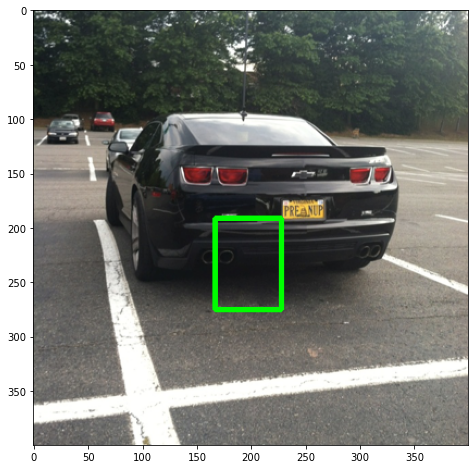

In [157]:
xmin, ymin,  xmax, ymax = coords[0]
pt1 = (xmin,ymin)
pt2 = (xmax,ymax)
print(pt1,pt2)
cv2.rectangle(image,pt1,pt2,(0,255,0),3)
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [23]:
!pip install easyocr

In [24]:
import easyocr

In [25]:
reader = easyocr.Reader(['en'])

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [28]:
ocr_result = reader.readText(roi)
print(ocr_result)

AttributeError: 'Reader' object has no attribute 'readText'